In [13]:
import gensim.downloader as api

# Load the model using gensim.downloader
model_Glove = api.load("glove-wiki-gigaword-300")

Vanilla **RNN**

In [14]:

from gensim.models import KeyedVectors# Load pre-trained model
# import torch
# import torch.nn as nn

import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import keras


In [15]:
# Specify the path to your JSON file
json_file_path = 'ATE_training_data.json'

# Read the JSON file
with open(json_file_path) as f:
    data = json.load(f)

# data
# print(len(data))

# Specify the path to your JSON file
json_file_path = 'ATE_validation_data.json'

# Read the JSON file
with open(json_file_path) as f:
    validation_data = json.load(f)




In [16]:
# max_len=0
# for key,value in data.items():
#     max_len=max(max_len,len(value['text'].split(" ")))
max_len=78


In [17]:
c=1
for key, value in data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print(word)
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word


for key, value in validation_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word

In [18]:
sentence_for_training = []
tags_for_training = []
X_train = []

for key, value in data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_training.append(word)
    tags_for_training.append(tags)

    # # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_train.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='pre')
# print(max_len)
# for i in X_train:
#     if(len(i)>max_len):
#         print(len(i))

In [19]:
print(X_train[5])
print(sentence_for_training[5])

[ 327    3    1  414 1169    4  199 1170 1171  200  136   72  268  156
  805   41  806   15  328  201   36    2    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
['However', ',', 'the', 'multi-touch', 'gestures', 'and', 'large', 'tracking', 'area', 'make', 'having', 'an', 'external', 'mouse', 'unnecessary', '(', 'unless', 'you', "'re", 'gaming', ')', '.']


In [20]:
X_train.shape

(906, 78)

In [21]:
sentence_for_validation = []
tags_for_validation = []
X_validation = []

for key, value in validation_data.items():
    word = value['word']
    tags = value['labels']

    # # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_validation.append(word)
    tags_for_validation.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_validation.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_validation)
X_validation = tokenizer.texts_to_sequences(X_validation)
X_validation = pad_sequences(X_validation, maxlen= max_len, padding='post', truncating='pre')
# y_validation = pad_sequences(y_validation, batch_first=True, padding_value=0)


In [22]:
print(X_train.shape)

(906, 78)


In [23]:
vocab = []
for i in sentence_for_training:
    for j in i:
        if j not in vocab:
            vocab.append(j)
# vocab = list(set(vocab))
print(len(vocab))    #30220

2740


In [128]:
vocab_weight = {}
c = 0
for i in vocab:
   if i in model_GloVe:  # Use model to access word vectors
       vocab_weight[i] = model_GloVe[i]

In [25]:
# give code to make embedding weight matrix
# vocab=len(vocab)+1
weights = np.zeros((len(vocab)+1, 300))
for i in range(len(vocab)):
    if(vocab[i] in vocab_weight):
        weights[i] = vocab_weight[vocab[i]]
    # weights[i] = vocab_weight[vocab[i]]



In [26]:
# weights = []
# for i in vocab:
#     weights.append(vocab_weight[i])
# weights = np.array(weights)
weights.shape
# # weights

(2741, 300)

In [27]:
y_train=[]
y_validation=[]
y_test=[]

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_train = word_tokenizer.texts_to_sequences(tags_for_training)  # use the tokeniser to encode input sequence.
y_train = pad_sequences(y_train, maxlen= max_len, padding='post', truncating='pre')


# for i in range(len(y_train)):
#     for j in range(len(y_train[i])):
#         y_train[i][j]-=1


word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_validation = word_tokenizer.texts_to_sequences(tags_for_validation)  # use the tokeniser to encode input sequence
y_validation = pad_sequences(y_validation,  maxlen= max_len, padding='post', truncating='pre')

# for i in range(len(y_validation)):
#     for j in range(len(y_validation[i])):
#         y_validation[i][j]-=1


# y_train = pad_sequences(y_train, maxlen= max_len, padding='pre', truncating='post')
# y_validation = pad_sequences(y_validation,maxlen= max_len, padding='pre', truncating='post')
y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)


# y_train.shape
# y_validation.shape
# y_train

In [28]:
print(y_train.shape)
print(y_validation.shape)

(906, 78, 4)
(219, 78, 4)


In [29]:
from tensorflow.keras import Model,Input
from keras.models import Sequential

from tensorflow.keras.layers import SimpleRNN,LSTM,Embedding,Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D,Bidirectional
# create architecture

# VOCABULARY_SIZE = len(vocab)


rnn_model = Sequential()
rnn_model.add(Embedding(input_dim     = len(vocab)+1,         # vocabulary size - number of unique words in data
                         output_dim    = 300,          # length of vector with which each word is represented
                         input_length  = max_len,          # length of input sequence
                         weights       = [weights],     # word embedding matrix
                         trainable     = True                     # True - update embeddings_weight matrix
))
rnn_model.add(SimpleRNN(64, return_sequences=True))
rnn_model.add(TimeDistributed(Dense(4, activation='softmax')))

2024-03-17 11:03:19.770340: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-17 11:03:19.770471: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-17 11:03:19.770483: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-17 11:03:19.770985: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-17 11:03:19.772117: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [30]:
from sklearn.metrics import f1_score

def macro_f1(y_true, y_pred):
    # labels are one-hot encoded. so, need to convert
    # [1,0,0] to 0 and
    # [0,1,0] to 1 and
    # [0,0,1] to 2. Then pass these arrays to sklearn f1_score.
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    return f1_score(y_true, y_pred, average='macro')

In [31]:
from keras import backend as K
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * precision * recall / (precision + recall + K.epsilon())

    macro_f1 = K.mean(f1)
    return macro_f1

# compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 78, 300)           822300    
                                                                 
 simple_rnn (SimpleRNN)      (None, 78, 64)            23360     
                                                                 
 time_distributed (TimeDist  (None, 78, 4)             260       
 ributed)                                                        
                                                                 
Total params: 845920 (3.23 MB)
Trainable params: 845920 (3.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
import numpy as np

# Convert input data to numpy arrays
# X_train_np = np.array(X_train)
# X_validation_np = np.array(X_validation)
# Reshape the input data to remove the extra dimension
X_train_np = np.array(X_train)
X_validation_np = np.array(X_validation)

y_train_np = np.array(y_train)
y_validation_np = np.array(y_validation)

# Train the model
rnn_training = rnn_model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_validation, y_validation))
#write code to print the training and validation loss and f1 macro not the graph






Epoch 1/10


2024-03-17 11:03:25.196933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 28s 3s/step - loss: 0.9243 - acc: 0.7547 - f1_m: 0.1203 - precision_m: 0.5556 - recall_m: 0.4537 - val_loss: 0.5684 - val_acc: 0.7658 - val_f1_m: 0.2017 - val_precision_m: 0.8253 - val_recall_m: 0.7527
Epoch 2/10
8/8 [==============================] - 26s 3s/step - loss: 0.5199 - acc: 0.7948 - f1_m: 0.2073 - precision_m: 0.8401 - recall_m: 0.7563 - val_loss: 0.4027 - val_acc: 0.9069 - val_f1_m: 0.2431 - val_precision_m: 0.9287 - val_recall_m: 0.8095
Epoch 3/10
8/8 [==============================] - 24s 3s/step - loss: 0.4432 - acc: 0.8813 - f1_m: 0.2469 - precision_m: 0.9209 - recall_m: 0.8008 - val_loss: 0.3612 - val_acc: 0.8567 - val_f1_m: 0.2235 - val_precision_m: 0.8589 - val_recall_m: 0.7868
Epoch 4/10
8/8 [==============================] - 25s 3s/step - loss: 0.3202 - acc: 0.8723 - f1_m: 0.2567 - precision_m: 0.8980 - recall_m: 0.8220 - val_loss: 0.2607 - val_acc: 0.9730 - val_f1_m: 0.4427 - val_precision_m: 0.9804 - val_recall_m: 0.9316
Epo

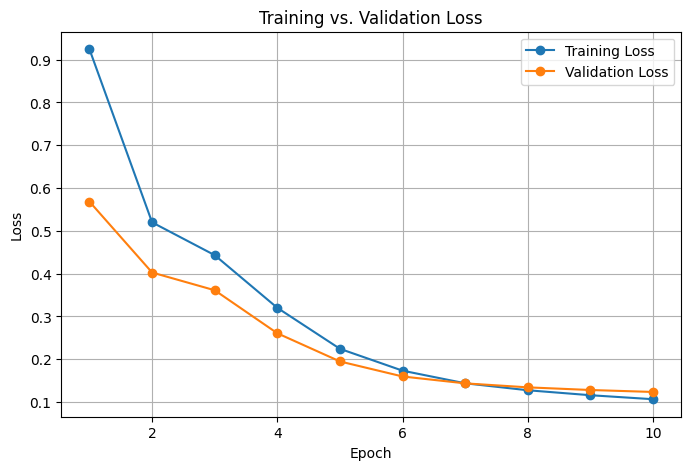

In [129]:
import matplotlib.pyplot as plt

train_loss = rnn_training.history['loss']
val_loss = rnn_training.history['val_loss']

epochs = range(1, len(train_loss) + 1)


plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training Loss')
plt.plot(epochs, val_loss, 'o-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.savefig('ATE_Glove_lossRNN.png') 

plt.grid(True)

plt.show()


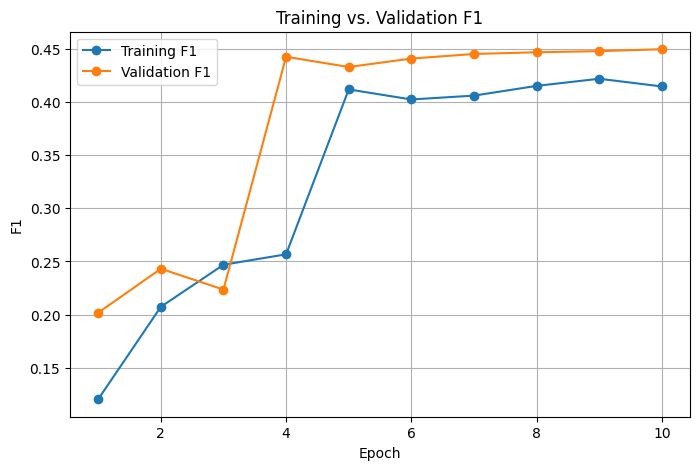

In [130]:
import matplotlib.pyplot as plt

train_loss = rnn_training.history['f1_m']
val_loss = rnn_training.history['val_f1_m']

epochs = range(1, len(train_loss) + 1)


plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training F1')
plt.plot(epochs, val_loss, 'o-', label='Validation F1')

plt.xlabel('Epoch')
plt.ylabel('F1')
plt.title('Training vs. Validation F1')
plt.legend()
plt.savefig('ATE_Glove_F1RNN.png')

plt.grid(True)

plt.show()

In [81]:
json_file_path = 'ATE_test_data.json'

# Read the JSON file
with open(json_file_path) as f:
    test_data = json.load(f)


In [82]:
for key, value in test_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print("SADf")
            continue
        new_word.append(word[i])
    value['word'] = new_word

In [83]:
X_test = []
tags_for_testing = []
sentence_for_testing = []
for key, value in test_data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_testing.append(word)
    tags_for_testing.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_test.append(word)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test,  maxlen= max_len, padding='post', truncating='pre')

In [84]:
print(X_test[0])
print(sentence_for_training[0])

[491 119   6 149  26   4 186 236  91 492 307   9 493 494   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]
['I', 'charge', 'it', 'at', 'night', 'and', 'skip', 'taking', 'the', 'cord', 'with', 'me', 'because', 'of', 'the', 'good', 'battery', 'life', '.']


In [85]:

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_testing)                    # fit tokeniser on data
y_test = word_tokenizer.texts_to_sequences(tags_for_testing)  # use the tokeniser to encode input sequence


# for i in range(len(y_test)):
#     for j in range(len(y_test[i])):
#         y_test[i][j]-=1

y_test = pad_sequences(y_test,  maxlen= max_len, padding='post', truncating='pre')
y_test = to_categorical(y_test)


In [86]:
print(y_test.shape)
# print(tags_for_testing[0])

(328, 78, 4)


In [87]:
# take 5 random sentence, print it , its label and the predicted label



In [88]:
# Evaluate the model
results = rnn_model.evaluate(X_test, y_test, verbose=1)

# Extracting loss and metrics from the results
loss = results[0]
metrics = results[1:]

# Printing loss and metrics
print("Loss:", loss)
print("Metrics:", metrics)

11/11 [==============================] - 2s 206ms/step - loss: 0.1641 - acc: 0.9470 - f1_m: 0.3478 - precision_m: 0.9515 - recall_m: 0.9325
Loss: 0.1641041338443756
Metrics: [0.9469590187072754, 0.34775933623313904, 0.9514949917793274, 0.9324737787246704]


In [89]:
accuracy=results[1]
f1_score=results[2]
precision=results[3]
recall=results[4]
print("Accuracy: ",accuracy)

Accuracy:  0.9469590187072754


In [90]:
# calculate f1 score

from sklearn.metrics import f1_score
y_pred = rnn_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_test = np.argmax(y_test, axis=-1)
f1 = f1_score(y_test.flatten(), y_pred.flatten(), average='macro')
print(f1)


11/11 [==============================] - 4s 359ms/step
0.47317373335889584


**LSTM**

In [102]:

from gensim.models import KeyedVectors# Load pre-trained model
# import torch
# import torch.nn as nn
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import keras


In [103]:
# Specify the path to your JSON file
json_file_path = 'ATE_training_data.json'

# Read the JSON file
with open(json_file_path) as f:
    data = json.load(f)

# data
# print(len(data))

# Specify the path to your JSON file
json_file_path = 'ATE_validation_data.json'

# Read the JSON file
with open(json_file_path) as f:
    validation_data = json.load(f)




In [104]:
# max_len=0
# for key,value in data.items():
#     max_len=max(max_len,len(value['text'].split(" ")))
max_len=100


In [105]:
c=1
for key, value in data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print(word)
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word


for key, value in validation_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word

In [106]:
sentence_for_training = []
tags_for_training = []
X_train = []

for key, value in data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_training.append(word)
    tags_for_training.append(tags)

    # # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_train.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='pre')
# print(max_len)
# for i in X_train:
#     if(len(i)>max_len):
#         print(len(i))

In [107]:
# len(y_train[0])

In [108]:
# len(y_test[0])

In [109]:
print(X_train[5])
print(sentence_for_training[5])

[ 327    3    1  414 1169    4  199 1170 1171  200  136   72  268  156
  805   41  806   15  328  201   36    2    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
['However', ',', 'the', 'multi-touch', 'gestures', 'and', 'large', 'tracking', 'area', 'make', 'having', 'an', 'external', 'mouse', 'unnecessary', '(', 'unless', 'you', "'re", 'gaming', ')', '.']


In [110]:
X_train.shape

(906, 100)

In [111]:
sentence_for_validation = []
tags_for_validation = []
X_validation = []

for key, value in validation_data.items():
    word = value['word']
    tags = value['labels']

    # # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_validation.append(word)
    tags_for_validation.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_validation.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_validation)
X_validation = tokenizer.texts_to_sequences(X_validation)
X_validation = pad_sequences(X_validation, maxlen= max_len, padding='post', truncating='pre')
# y_validation = pad_sequences(y_validation, batch_first=True, padding_value=0)


In [112]:
print(X_train.shape)

(906, 100)


In [113]:
print(sentence_for_training[0])

['I', 'charge', 'it', 'at', 'night', 'and', 'skip', 'taking', 'the', 'cord', 'with', 'me', 'because', 'of', 'the', 'good', 'battery', 'life', '.']


In [114]:
vocab = []
for i in sentence_for_training:
    for j in i:
        if j not in vocab:
            vocab.append(j)
# vocab = list(set(vocab))
print(len(vocab))    #30220

2740


In [117]:
model_GloVe=model_Glove

In [118]:
vocab_weight = {}
c = 0
for i in vocab:
   if i in model_GloVe:
       vocab_weight[i] = model_GloVe[i]

In [119]:
# give code to make embedding weight matrix
# vocab=len(vocab)+1

weights = np.zeros((len(vocab)+1, 300))
for i in range(len(vocab)):
    if(vocab[i] in vocab_weight):
        weights[i] = vocab_weight[vocab[i]]
    # weights[i] = vocab_weight[vocab[i]]



In [120]:
# weights = []
# for i in vocab:
#     weights.append(vocab_weight[i])
# weights = np.array(weights)
weights.shape
# # weights

(2741, 300)

In [121]:
y_train=[]
y_validation=[]
y_test=[]

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_train = word_tokenizer.texts_to_sequences(tags_for_training)  # use the tokeniser to encode input sequence.
y_train = pad_sequences(y_train, maxlen= max_len, padding='post', truncating='pre')


# for i in range(len(y_train)):
#     for j in range(len(y_train[i])):
#         y_train[i][j]-=1


word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_validation = word_tokenizer.texts_to_sequences(tags_for_validation)  # use the tokeniser to encode input sequence
y_validation = pad_sequences(y_validation,  maxlen= max_len, padding='post', truncating='pre')

# for i in range(len(y_validation)):
#     for j in range(len(y_validation[i])):
#         y_validation[i][j]-=1


# y_train = pad_sequences(y_train, maxlen= max_len, padding='pre', truncating='post')
# y_validation = pad_sequences(y_validation,maxlen= max_len, padding='pre', truncating='post')
y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)


# y_train.shape
# y_validation.shape
# y_train

In [122]:
print(y_train.shape)
print(y_validation.shape)

(906, 100, 4)
(219, 100, 4)


In [123]:
from tensorflow.keras import Model,Input
from keras.models import Sequential

from tensorflow.keras.layers import LSTM,Embedding,Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D,Bidirectional
# create architecture

# VOCABULARY_SIZE = len(vocab)


lstm_model = Sequential()
lstm_model.add(Embedding(input_dim     = len(vocab)+1,         # vocabulary size - number of unique words in data
                         output_dim    = 300,          # length of vector with which each word is represented
                         input_length  = max_len,          # length of input sequence
                         weights       = [weights],     # word embedding matrix
                         trainable     = True                     # True - update embeddings_weight matrix
))
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(TimeDistributed(Dense(4, activation='softmax')))

In [124]:
from keras import backend as K
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * precision * recall / (precision + recall + K.epsilon())

    macro_f1 = K.mean(f1)
    return macro_f1

# compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])




In [125]:
import numpy as np

# Convert input data to numpy arrays
# X_train_np = np.array(X_train)
# X_validation_np = np.array(X_validation)
# Reshape the input data to remove the extra dimension
X_train_np = np.array(X_train)
X_validation_np = np.array(X_validation)

y_train_np = np.array(y_train)
y_validation_np = np.array(y_validation)

In [126]:
print("Shape of X_train_np:", X_train_np.shape)
print("Shape of X_validation_np:", X_validation_np.shape)
print("Shape of y_train_np:", y_train_np.shape)
print("Shape of y_validation_np:", y_validation_np.shape)

Shape of X_train_np: (906, 100)
Shape of X_validation_np: (219, 100)
Shape of y_train_np: (906, 100, 4)
Shape of y_validation_np: (219, 100, 4)


In [127]:
lstm_training = lstm_model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_validation, y_validation))


Epoch 1/10
8/8 [==============================] - 5s 311ms/step - loss: 1.2598 - acc: 0.8175 - f1_m: 0.0361 - precision_m: 0.4495 - recall_m: 0.0429 - val_loss: 0.9877 - val_acc: 0.9418 - val_f1_m: 0.1635 - val_precision_m: 0.8497 - val_recall_m: 0.1355
Epoch 2/10
8/8 [==============================] - 2s 185ms/step - loss: 0.7215 - acc: 0.9523 - f1_m: 0.2522 - precision_m: 0.9106 - recall_m: 0.5547 - val_loss: 0.2611 - val_acc: 0.9681 - val_f1_m: 0.3998 - val_precision_m: 0.9733 - val_recall_m: 0.9538
Epoch 3/10
8/8 [==============================] - 1s 147ms/step - loss: 0.1850 - acc: 0.9703 - f1_m: 0.3702 - precision_m: 0.9736 - recall_m: 0.9580 - val_loss: 0.1275 - val_acc: 0.9715 - val_f1_m: 0.4065 - val_precision_m: 0.9738 - val_recall_m: 0.9660
Epoch 4/10
8/8 [==============================] - 1s 101ms/step - loss: 0.1208 - acc: 0.9699 - f1_m: 0.3697 - precision_m: 0.9721 - recall_m: 0.9654 - val_loss: 0.1082 - val_acc: 0.9716 - val_f1_m: 0.4068 - val_precision_m: 0.9728 - val_r

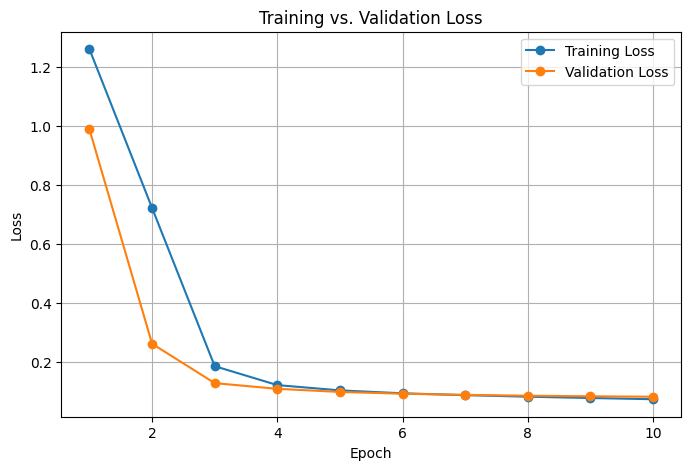

In [141]:
import matplotlib.pyplot as plt

train_loss = lstm_training.history['loss']
val_loss = lstm_training.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training Loss')
plt.plot(epochs, val_loss, 'o-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.savefig('ATE_Glove_lossLSTM.png')

plt.grid(True)

plt.show()


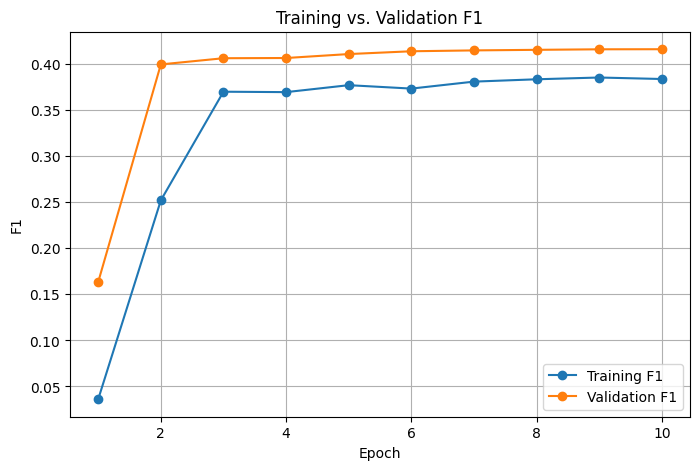

In [142]:
import matplotlib.pyplot as plt

train_loss = lstm_training.history['f1_m']
val_loss = lstm_training.history['val_f1_m']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training F1')
plt.plot(epochs, val_loss, 'o-', label='Validation F1')

plt.xlabel('Epoch')
plt.ylabel('F1')
plt.title('Training vs. Validation F1')
plt.legend()
plt.savefig('ATE_Glove_F1LSTM.png')
plt.grid(True)

plt.show()


In [189]:
json_file_path = 'ATE_test_data.json'

# Read the JSON file
with open(json_file_path) as f:
    test_data = json.load(f)


In [190]:
for key, value in test_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print("SADf")
            continue
        new_word.append(word[i])
    value['word'] = new_word

In [191]:
X_test = []
tags_for_testing = []
sentence_for_testing = []
for key, value in test_data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_testing.append(word)
    tags_for_testing.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_test.append(word)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test,  maxlen= max_len, padding='post', truncating='pre')

In [192]:
print(X_test[0])
print(sentence_for_training[0])

[491 119   6 149  26   4 186 236  91 492 307   9 493 494   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
['I', 'charge', 'it', 'at', 'night', 'and', 'skip', 'taking', 'the', 'cord', 'with', 'me', 'because', 'of', 'the', 'good', 'battery', 'life', '.']


In [193]:

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_testing)                    # fit tokeniser on data
y_test = word_tokenizer.texts_to_sequences(tags_for_testing)  # use the tokeniser to encode input sequence


# for i in range(len(y_test)):
#     for j in range(len(y_test[i])):
#         y_test[i][j]-=1

y_test = pad_sequences(y_test,  maxlen= max_len, padding='post', truncating='pre')
y_test = to_categorical(y_test)


In [194]:
print(y_test.shape)
# print(tags_for_testing[0])

(328, 100, 4)


In [195]:
# Evaluate the model
results = rnn_model.evaluate(X_test, y_test, verbose=1)

# Extracting loss and metrics from the results
loss = results[0]
metrics = results[1:]

# Printing loss and metrics
print("Loss:", loss)
print("Metrics:", metrics)


11/11 [==============================] - 4s 315ms/step - loss: 0.1286 - acc: 0.9586 - f1_m: 0.3263 - precision_m: 0.9623 - recall_m: 0.9473
Loss: 0.12857964634895325
Metrics: [0.9586280584335327, 0.326252281665802, 0.9623359441757202, 0.947329580783844]


In [196]:
# calculate f1 score

from sklearn.metrics import f1_score
y_pred = lstm_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_test = np.argmax(y_test, axis=-1)
f1 = f1_score(y_test.flatten(), y_pred.flatten(), average='macro')
print(f1)
accuracy=results[1]
print("Accuracy: ",accuracy)

 1/11 [=>............................] - ETA: 0s

11/11 [==============================] - 0s 8ms/step
0.46490726705887164
Accuracy:  0.9586280584335327


**GRU**

In [151]:

from gensim.models import KeyedVectors# Load pre-trained model
# import torch
# import torch.nn as nn
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import keras


In [152]:
# Specify the path to your JSON file
json_file_path = 'ATE_training_data.json'

# Read the JSON file
with open(json_file_path) as f:
    data = json.load(f)

# data
# print(len(data))

# Specify the path to your JSON file
json_file_path = 'ATE_validation_data.json'

# Read the JSON file
with open(json_file_path) as f:
    validation_data = json.load(f)




In [153]:
# max_len=0
# for key,value in data.items():
#     max_len=max(max_len,len(value['text'].split(" ")))
max_len=100


In [154]:
c=1
for key, value in data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print(word)
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word


for key, value in validation_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            continue
        # new_labels.append(labels[i])
        new_word.append(word[i])
    # value['labels'] = new_labels
    value['word'] = new_word

In [155]:
sentence_for_training = []
tags_for_training = []
X_train = []

for key, value in data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_training.append(word)
    tags_for_training.append(tags)

    # # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_train.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='pre')
# print(max_len)
# for i in X_train:
#     if(len(i)>max_len):
#         print(len(i))

In [156]:
sentence_for_validation = []
tags_for_validation = []
X_validation = []

for key, value in validation_data.items():
    word = value['word']
    tags = value['labels']

    # # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_validation.append(word)
    tags_for_validation.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_validation.append(word)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_validation)
X_validation = tokenizer.texts_to_sequences(X_validation)
X_validation = pad_sequences(X_validation, maxlen= max_len, padding='post', truncating='pre')
# y_validation = pad_sequences(y_validation, batch_first=True, padding_value=0)


In [157]:
print(X_train.shape)

(906, 100)


In [158]:
vocab = []
for i in sentence_for_training:
    for j in i:
        if j not in vocab:
            vocab.append(j)
# vocab = list(set(vocab))
print(len(vocab))    #30220

2740


In [159]:
vocab_weight = {}
c = 0
for i in vocab:
   if i in model_GloVe:
       vocab_weight[i] = model_GloVe[i]

In [160]:
# give code to make embedding weight matrix
# vocab=len(vocab)+1
weights = np.zeros((len(vocab)+1, 300))
for i in range(len(vocab)):
    if(vocab[i] in vocab_weight):
        weights[i] = vocab_weight[vocab[i]]
    # weights[i] = vocab_weight[vocab[i]]



In [161]:
# weights = []
# for i in vocab:
#     weights.append(vocab_weight[i])
# weights = np.array(weights)
weights.shape
# # weights

(2741, 300)

In [162]:
y_train=[]
y_validation=[]
y_test=[]

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_train = word_tokenizer.texts_to_sequences(tags_for_training)  # use the tokeniser to encode input sequence.
y_train = pad_sequences(y_train, maxlen= max_len, padding='post', truncating='pre')


# for i in range(len(y_train)):
#     for j in range(len(y_train[i])):
#         y_train[i][j]-=1


word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_training)                    # fit tokeniser on data
y_validation = word_tokenizer.texts_to_sequences(tags_for_validation)  # use the tokeniser to encode input sequence
y_validation = pad_sequences(y_validation,  maxlen= max_len, padding='post', truncating='pre')

# for i in range(len(y_validation)):
#     for j in range(len(y_validation[i])):
#         y_validation[i][j]-=1


# y_train = pad_sequences(y_train, maxlen= max_len, padding='pre', truncating='post')
# y_validation = pad_sequences(y_validation,maxlen= max_len, padding='pre', truncating='post')
y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)


# y_train.shape
# y_validation.shape
# y_train

In [163]:
print(y_train.shape)
print(y_validation.shape)

(906, 100, 4)
(219, 100, 4)


In [164]:
from tensorflow.keras import Model,Input
from keras.models import Sequential

from tensorflow.keras.layers import GRU,SimpleRNN,LSTM,Embedding,Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D,Bidirectional
# create architecture

# VOCABULARY_SIZE = len(vocab)


gru_model = Sequential()
gru_model.add(Embedding(input_dim     = len(vocab)+1,         # vocabulary size - number of unique words in data
                         output_dim    = 300,          # length of vector with which each word is represented
                         input_length  = max_len,          # length of input sequence
                         weights       = [weights],     # word embedding matrix
                         trainable     = True                     # True - update embeddings_weight matrix
))
gru_model.add(GRU(64, return_sequences=True))
gru_model.add(TimeDistributed(Dense(4, activation='softmax')))

In [165]:
from keras import backend as K
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * precision * recall / (precision + recall + K.epsilon())

    macro_f1 = K.mean(f1)
    return macro_f1

# compile the model
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])




In [166]:
import numpy as np

# Convert input data to numpy arrays
# X_train_np = np.array(X_train)
# X_validation_np = np.array(X_validation)
# Reshape the input data to remove the extra dimension
X_train_np = np.array(X_train)
X_validation_np = np.array(X_validation)

y_train_np = np.array(y_train)
y_validation_np = np.array(y_validation)

# Train the model
gru_training = gru_model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_validation, y_validation))
#write code to print the training and validation loss and f1 macro not the graph






Epoch 1/10


8/8 [==============================] - 3s 263ms/step - loss: 1.2294 - acc: 0.8858 - f1_m: 0.0575 - precision_m: 0.6667 - recall_m: 0.0629 - val_loss: 0.9949 - val_acc: 0.9511 - val_f1_m: 0.1693 - val_precision_m: 0.8582 - val_recall_m: 0.1579
Epoch 2/10
8/8 [==============================] - 1s 124ms/step - loss: 0.8123 - acc: 0.9581 - f1_m: 0.1932 - precision_m: 0.8829 - recall_m: 0.3613 - val_loss: 0.4485 - val_acc: 0.9695 - val_f1_m: 0.4009 - val_precision_m: 0.9711 - val_recall_m: 0.9626
Epoch 3/10
8/8 [==============================] - 1s 98ms/step - loss: 0.2656 - acc: 0.9706 - f1_m: 0.3754 - precision_m: 0.9740 - recall_m: 0.9675 - val_loss: 0.1092 - val_acc: 0.9766 - val_f1_m: 0.4127 - val_precision_m: 0.9788 - val_recall_m: 0.9734
Epoch 4/10
8/8 [==============================] - 1s 115ms/step - loss: 0.0949 - acc: 0.9778 - f1_m: 0.3850 - precision_m: 0.9800 - recall_m: 0.9755 - val_loss: 0.0870 - val_acc: 0.9781 - val_f1_m: 0.4148 - val_precision_m: 0.9800 - val_recall_m: 0.9

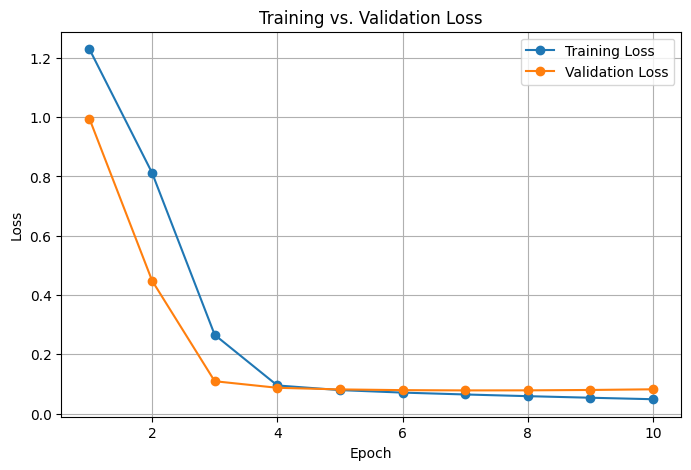

In [167]:
import matplotlib.pyplot as plt

train_loss = gru_training.history['loss']
val_loss = gru_training.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training Loss')
plt.plot(epochs, val_loss, 'o-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.savefig('ATE_Glove_lossGRU.png')

plt.grid(True)

plt.show()


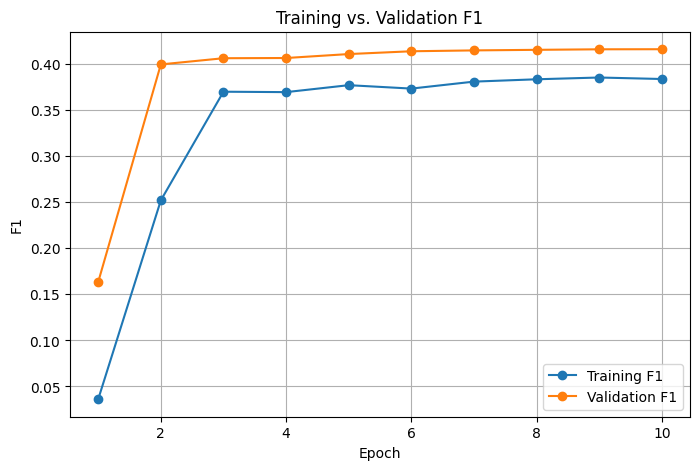

In [168]:
import matplotlib.pyplot as plt

train_loss = lstm_training.history['f1_m']
val_loss = lstm_training.history['val_f1_m']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'o-', label='Training F1')
plt.plot(epochs, val_loss, 'o-', label='Validation F1')

plt.xlabel('Epoch')
plt.ylabel('F1')
plt.title('Training vs. Validation F1')
plt.legend()
plt.savefig('ATE_Glove_F1GRU.png')

plt.grid(True)

plt.show()


In [169]:
json_file_path = 'ATE_test_data.json'

# Read the JSON file
with open(json_file_path) as f:
    test_data = json.load(f)


In [170]:
for key, value in test_data.items():
    word = value['text'].split(" ")
    labels = value['labels']
    new_labels = []
    new_word = []
    for i in range(len(word)):
        if(word[i]==''):
            print("SADf")
            continue
        new_word.append(word[i])
    value['word'] = new_word

In [171]:
X_test = []
tags_for_testing = []
sentence_for_testing = []
for key, value in test_data.items():
    word = value['word']
    tags = value['labels']
    sentence = value['text']
    # Pad the entire sentence
    # if len(word) < max_len:
    #     word += [''] * (max_len - len(word))
    #     tags += ['O'] * (max_len - len(tags))

    sentence_for_testing.append(word)
    tags_for_testing.append(tags)

    # Tokenize the entire sentence
    # tokenizer = Tokenizer()
    # tokenizer.fit_on_texts([word])
    X_test.append(word)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test,  maxlen= max_len, padding='post', truncating='pre')

In [172]:
print(X_test[0])
print(sentence_for_training[0])

[491 119   6 149  26   4 186 236  91 492 307   9 493 494   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
['I', 'charge', 'it', 'at', 'night', 'and', 'skip', 'taking', 'the', 'cord', 'with', 'me', 'because', 'of', 'the', 'good', 'battery', 'life', '.']


In [173]:

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(tags_for_testing)                    # fit tokeniser on data
y_test = word_tokenizer.texts_to_sequences(tags_for_testing)  # use the tokeniser to encode input sequence


# for i in range(len(y_test)):
#     for j in range(len(y_test[i])):
#         y_test[i][j]-=1

y_test = pad_sequences(y_test,  maxlen= max_len, padding='post', truncating='pre')
y_test = to_categorical(y_test)


In [174]:
print(y_test.shape)
# print(tags_for_testing[0])

(328, 100, 4)


In [175]:
# take 5 random sentence, print it , its label and the predicted label



In [176]:
# Evaluate the model
results = rnn_model.evaluate(X_test, y_test, verbose=1)

# Extracting loss and metrics from the results
loss = results[0]
metrics = results[1:]

# Printing loss and metrics
print("Loss:", loss)
print("Metrics:", metrics)


11/11 [==============================] - 4s 388ms/step - loss: 0.1286 - acc: 0.9586 - f1_m: 0.3263 - precision_m: 0.9623 - recall_m: 0.9473
Loss: 0.12857964634895325
Metrics: [0.9586280584335327, 0.326252281665802, 0.9623359441757202, 0.947329580783844]


In [177]:
# calculate f1 score

from sklearn.metrics import f1_score
y_pred = gru_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_test = np.argmax(y_test, axis=-1)
f1 = f1_score(y_test.flatten(), y_pred.flatten(), average='macro')
print(f1)

11/11 [==============================] - 1s 28ms/step
0.47571090914869746


In [179]:
accuracy=results[1] 
print(accuracy)

0.9586280584335327


In [197]:


# save the models
rnn_model.save('ATErnnGlvoe.h5')
lstm_model.save('ATElstmGlove.h5')
gru_model.save('ATEgruGlove.h5')


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
